In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# minus 폰트 깨짐 방지
plt.rc('axes', unicode_minus = False)

#한글 폰트 설정
plt.rc('font', family='NanumGothic')

# retina 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

# csv 파일 불러오기
df = pd.read_csv("data file/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory = False)

In [2]:
df_seoul_drug = df[(df["상권업종소분류명"] == "약국")&(df["시도명"] == "서울특별시")]["시군구명"]

In [3]:
c = df_seoul_drug.value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

df_seoul_drug를 c라는 변수에 넣고 value_counts()를 합니다.

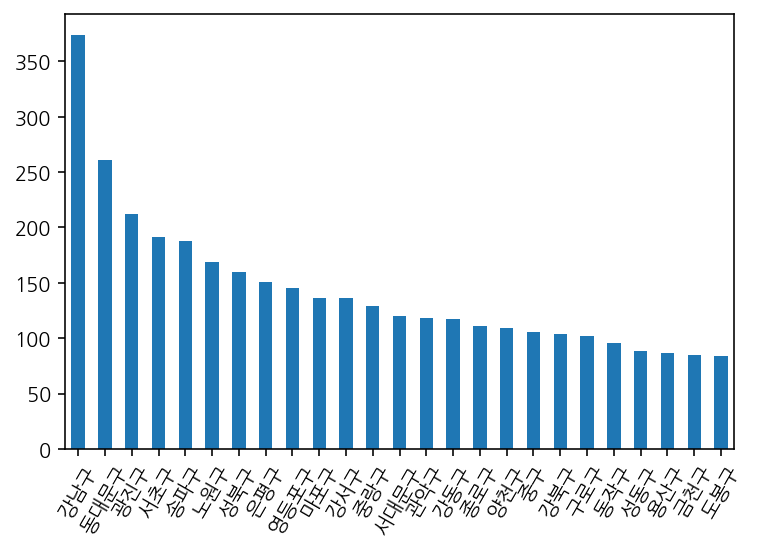

In [4]:
c.plot.bar(rot=60)

c를 시각화 합니다.

In [5]:
n = df_seoul_drug.value_counts(normalize=True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

normalize한 데이터를 n이라는 변수에 넣어서 봅니다.

In [6]:
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy()
df_seoul_hospital

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048
353,20471487,홍익병원별관,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1147010100108970013001044,홍익병원별관,서울특별시 양천구 국회대로 250,158070.0,7937.0,NaN,1,NaN,126.862805,37.529213
385,20737057,SNUH,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107360055027688,성보빌딩,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,NaN,4,NaN,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296
2461,20024045,한양,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1120010700100150001019623,한대동문회관,서울특별시 성동구 마조로 22-2,133070.0,4763.0,NaN,4,NaN,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,응급의료센터,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700101230000017226,가톨릭대학교성의교정,서울특별시 서초구 반포대로 222,137701.0,6591.0,NaN,1,NaN,127.005841,37.502382
76508,12292992,라마르의원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1174010900104530021010314,원방빌딩,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,NaN,NaN,NaN,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1114012700100010001019574,명동성당,서울특별시 중구 명동길 74,100809.0,4537.0,NaN,NaN,NaN,126.986758,37.563662
90581,16332576,씨엠병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156010500100900000035097,충무병원,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,NaN,NaN,NaN,126.903857,37.518807


이번에는 2개의 조건을 and 연산자를 이용해서 합쳐 서울시 종합병원만 분석해 봅니다.

In [7]:
df_seoul_hospital["시군구명"]

305       광진구
353       양천구
385       강남구
1917     영등포구
2461      성동구
         ... 
71991     서초구
76508     강동구
90492      중구
90581    영등포구
90788     강남구
Name: 시군구명, Length: 91, dtype: object

In [8]:
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
송파구      5
강동구      5
중구       5
양천구      4
서대문구     4
도봉구      4
강북구      4
성북구      3
중랑구      2
동대문구     2
관악구      2
종로구      2
성동구      2
강서구      2
노원구      2
금천구      2
구로구      2
은평구      1
동작구      1
용산구      1
마포구      1
Name: 시군구명, dtype: int64

시군구명의 값의 갯수를 셉니다.

## 텍스트 데이터 색인

In [9]:
df_seoul_hospital["상호명"].str.contains("종합병원")

305      False
353      False
385      False
1917     False
2461     False
         ...  
71991    False
76508    False
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [10]:
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

상호명에 종합병원이 들어간 데이터의 상호명을 중복 없이 가져왔습니다. 여기서 병원이 아닌 꽃배달과 다른 병원이 아닌 것들을 제거해 보겠습니다.

In [11]:
df_seoul_hospital["상호명"].str.contains("꽃배달")

305      False
353      False
385      False
1917     False
2461     False
         ...  
71991    False
76508    False
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [12]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700105510000017194,NaN,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,1,1,NaN,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700105470006016762,이이빌딩,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,NaN,1,NaN,127.001756,37.499095


꽃배달이 상호명에 포함된 데이터를 확인합니다.

In [13]:
drop_row = df_seoul_hospital[
df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index

drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

상호명에 여레개의 데이터가 들어간 테이터의 인덱스 번호를 인덱스 형태로 변환합니다.

In [14]:
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2.tolist()
drop_row2

Int64Index([ 8479, 12854, 13715, 14966, 16091, 18047, 20200, 20415, 30706,
            32889, 34459, 34720, 35696, 37251, 45120, 49626, 51575, 55133,
            56320, 56404, 56688, 57551, 62113, 76508],
           dtype='int64')

상호명에 의원이 들어간 데이터의 인덱스 번호 또한 리스트 형태로 변환합니다.

## 데이터 제거하기

In [15]:
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
df_seoul_hospital = df_seoul_hospital.drop(drop_row2, axis=0)
print(df_seoul_hospital.shape)

(91, 39)
(58, 39)


위 2개의 조건을 삭제해 줍니다.

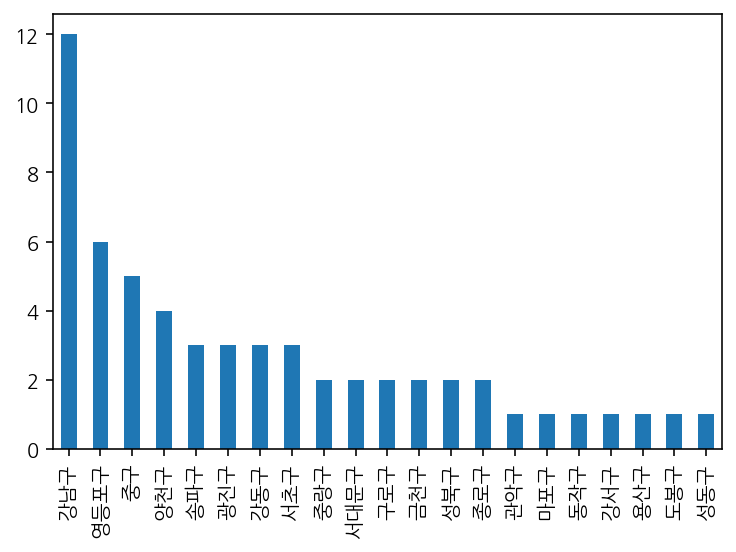

In [16]:
df_seoul_hospital["시군구명"].value_counts().plot.bar()

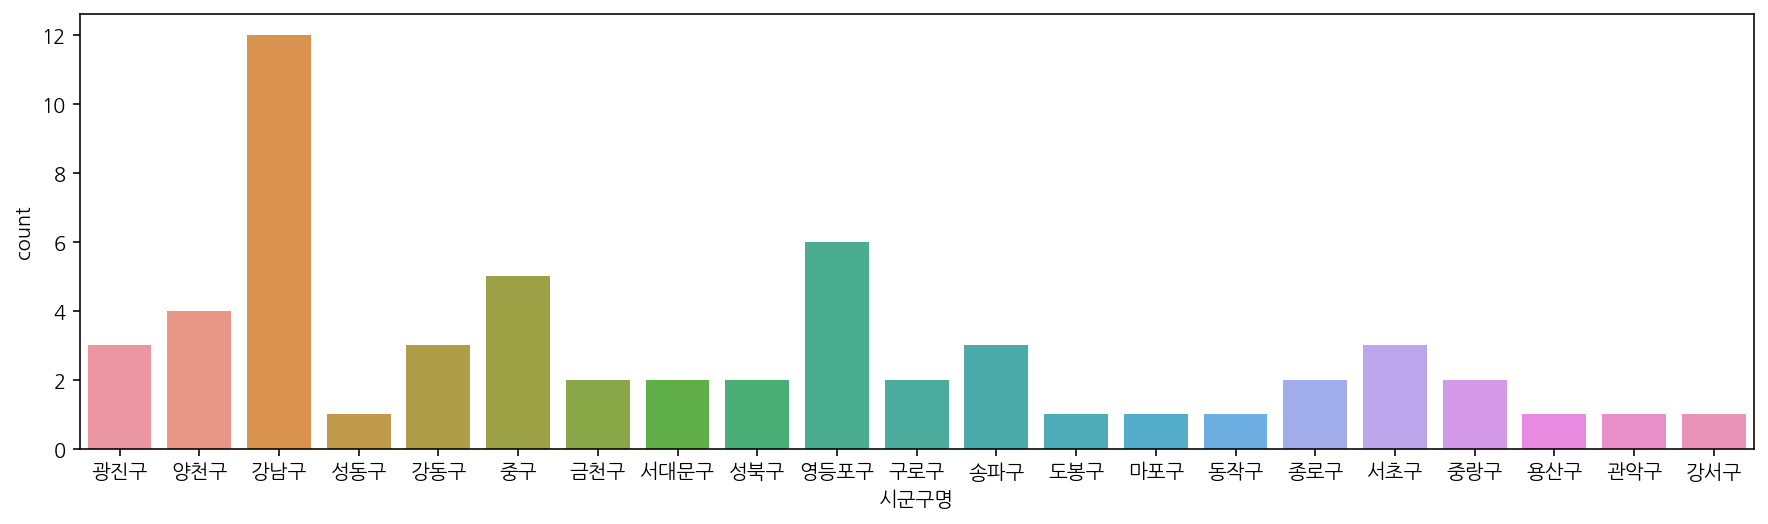

In [17]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul_hospital, x="시군구명")

그래프를 그려보고 seaborn으로 데이터 시각화를 해봅니다.